# Problem Statement
## Objectives

The project objective is to predict the occurrence of car failure using the provided dataset for an automotive
company to formulate mitigative policies.The prediction is based on  3 car failure prediction models using datasets for car specification and measured by car sensors.



## Assumptions and their verification

### Factory name

### RPM sensor data
Dataset
The dataset contains the specifications of the cars as well as parameters measured by the car sensors. Do
note that there could be synthetic features in the dataset. Hence, please ensure that you state and verify
any assumptions that you make."""

In [44]:
"""
Evaluation
In the submitted notebook, you are required to

Outline the steps taken in the EDA process
Explain the purpose of each step
Explain the conclusions drawn from each step
Explain the interpretation of the various statistics generated and how they impact your analysis
Generate clear, meaningful, and understandable visualizations that support your findings
Organize the notebook so that is it clear and easy to understand
Please note that your submission will be heavily penalized for any of the following conditions:
1. `.ipynb` missing in the submitted repository
2. `.ipynb` cannot be opened on Jupyter Notebook
3. Explanations missing or unclear in the submitted Jupyter Notebook
"""

'\nEvaluation\nIn the submitted notebook, you are required to\n\nOutline the steps taken in the EDA process\nExplain the purpose of each step\nExplain the conclusions drawn from each step\nExplain the interpretation of the various statistics generated and how they impact your analysis\nGenerate clear, meaningful, and understandable visualizations that support your findings\nOrganize the notebook so that is it clear and easy to understand\nPlease note that your submission will be heavily penalized for any of the following conditions:\n1. `.ipynb` missing in the submitted repository\n2. `.ipynb` cannot be opened on Jupyter Notebook\n3. Explanations missing or unclear in the submitted Jupyter Notebook\n'

| Attribute        | Description                                                                                                                                                                                                                                                                                                                                              |
| ---------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Car ID           | Car unique ID                                                                                                                                                                                                                                                                                                                                            |
| Model            | Car model 3, 5, and 7 (in the order of increasing specifications)                                                                                                                                                                                                                                                                                        |
| Color            | Color of the car                                                                                                                                                                                                                                                                                                                                         |
| Temperature      | Average 30 days temperature of the car engine before failure detected                                                                                                                                                                                                                                                                                    |
| RPM              | Average 30 days maximum torque speed at maximum torque before failure detected                                                                                                                                                                                                                                                                           |
| Factory          | Manufacturing origin of the car                                                                                                                                                                                                                                                                                                                          |
| Usage            | Owner usage frequency of the car                                                                                                                                                                                                                                                                                                                         |
| Fuel consumption | Fuel consumption of the car in Litre per kilometre                                                                                                                                                                                                                                                                                                       |
| Membership       | Type of membership subscripted by the car owner with the automotive company.<br>“Normal” membership offers subscribers two complimentary car servicing per year.<br>“Premium” membership offers subscribers unlimited car servicing.<br>Car owners are automatically subscribed with “Normal” membership<br>for the first five years after car purchase. |
| Failure A        | A type of car failure:<br>“0” = Corresponding fault not identified,<br>“1” = Corresponding fault identified                                                                                                                                                                                                                                              |
| Failure B        | A type of car failure:<br>“0” = Corresponding fault not identified,<br>“1” = Corresponding fault identified                                                                                                                                                                                                                                              |
| Failure C        | A type of car failure:<br>“0” = Corresponding fault not identified,<br>“1” = Corresponding fault identified                                                                                                                                                                                                                                              |
| Failure D        | A type of car failure:<br>“0” = Corresponding fault not identified,<br>“1” = Corresponding fault identified                                                                                                                                                                                                                                              |
| Failure E        | A type of car failure:<br>“0” = Corresponding fault not identified,<br>“1” = Corresponding fault identified                                                                                                                                                                                                                                              |


In [45]:
# import pandas as pd
# csv_path = "./data/failure.csv"
# df = pd.read_csv(csv_path)
# df.head()

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:

db_path = "data/failure.db"
con = sqlite3.connect(db_path)
df = pd.read_sql_query('SELECT * from failure', con)
df.head()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
0,137b948a-c99f-4afa-a2a7-9ef65ae51e8f,"Model 5, 2022",Blue,110.3 °C,1551,"Shang Hai, China",Medium,659.7,Normal,0,0,0,0,0
1,3395a182-7e76-4fb3-94ba-5163d8f4e6b0,"Model 3, 2022",Black,110.4 °C,1408,"Shang Hai, China",Medium,705.3,Premium,1,0,0,0,0
2,8c6a8e5b-d869-4665-b739-819c9e4a2070,"Model 3, 2022",Grey,110.3 °C,1498,"Shang Hai, China",Low,670.7,Premium,0,0,0,0,0
3,ff864366-fe5e-409e-9b2f-8fe440d8cc5b,"Model 3, 2022",Black,110.4 °C,1433,"Berlin, Germany",High,630.6,Premium,1,0,0,0,0
4,10484506-1be0-4a86-8dbc-b8b2092b93b2,"Model 3, 2022",White,230.7 °C,1408,"New York, U.S",High,660.9,Normal,0,1,0,0,0


# Data cleaning
## We clean rows with duplicated "Car ID", data with empty Membership, illogical data such as Negative RPM

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10081 entries, 0 to 10080
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car ID            10081 non-null  object 
 1   Model             10081 non-null  object 
 2   Color             10081 non-null  object 
 3   Temperature       10081 non-null  object 
 4   RPM               10081 non-null  int64  
 5   Factory           10081 non-null  object 
 6   Usage             10081 non-null  object 
 7   Fuel consumption  10081 non-null  float64
 8   Membership        9697 non-null   object 
 9   Failure A         10081 non-null  int64  
 10  Failure B         10081 non-null  int64  
 11  Failure C         10081 non-null  int64  
 12  Failure D         10081 non-null  int64  
 13  Failure E         10081 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


We notice there's some missing data in column "Membership". 
We will focus on that after removing duplicated rows.

## Clean duplicated rows
We check for duplicated rows to remove redundant data. The redundant data can lead to wrong statistical finding and low model accuracy. We found 81 rows that are duplicated and removed the respective duplicated rows.

In [49]:
df.duplicated().sum()

81

There's 81 duplicated rows. Since the unqique index should be "Car ID", let's focus on duplicated rows and sort them using index "Car ID".

In [50]:
df_dup = df[df.duplicated(keep=False)].sort_values(["Car ID"],ascending=True)
display(df_dup.head())
print(f"num of duplicated rows {len(df_dup)}")
# df_dup.drop_duplicates(keep="first", inplace=True)
# display(df_dup.head(2))
# assert len(df_dup) == len(df_dup["Car ID"].unique()), f'different lenght {len(df_dup)} != {len(df_dup["Car ID"].unique())}'
# display(df_dup[df.isna()]) #why still NA

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E
10046,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
66,05fc6931-1619-4077-976e-26caf0f7ddab,"Model 5, 2013",Black,231.1 °F,-1679,"New York, U.S",High,697.9,Normal,0,0,0,0,0
10078,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
98,0b9c5542-e343-4b7e-a4c9-aad358dbe993,"Model 3, 2019",White,110.6 °C,1529,"Shang Hai, China",Low,651.5,Normal,0,0,0,0,0
10006,0d510f67-2238-4de0-9ac9-1e5a8e345622,"Model 3, 2018",Red,110.7 °C,1512,"Berlin, Germany",Low,601.2,Premium,0,0,0,0,0


num of duplicated rows 162


We found that "Car ID" "05fc6931-1619-4077-976e-26caf0f7ddab" appears twice. We will keep its first appearance and delete its duplicated rows. The same applied for other duplicated "Car ID"

In [51]:
car_id = "05fc6931-1619-4077-976e-26caf0f7ddab"
print(f"Before removing duplicated rows, num of record with Car ID {car_id}: {len(df[df['Car ID']==car_id])}")
df.drop_duplicates(keep="first", inplace=True)
print(f"After removing duplicated rows, num of record with Car ID {car_id}: {len(df[df['Car ID']==car_id])}")
df_dup = df[df.duplicated(keep=False)].sort_values(["Car ID"])
print(f"There's {len(df_dup)} dupllicated rows left")

Before removing duplicated rows, num of record with Car ID 05fc6931-1619-4077-976e-26caf0f7ddab: 2
After removing duplicated rows, num of record with Car ID 05fc6931-1619-4077-976e-26caf0f7ddab: 1
There's 0 dupllicated rows left


## Check empty data

In [52]:
print(f"num of empyt cell \n {df.isna().sum()}")

num of empyt cell 
 Car ID                0
Model                 0
Color                 0
Temperature           0
RPM                   0
Factory               0
Usage                 0
Fuel consumption      0
Membership          383
Failure A             0
Failure B             0
Failure C             0
Failure D             0
Failure E             0
dtype: int64


<AxesSubplot: >

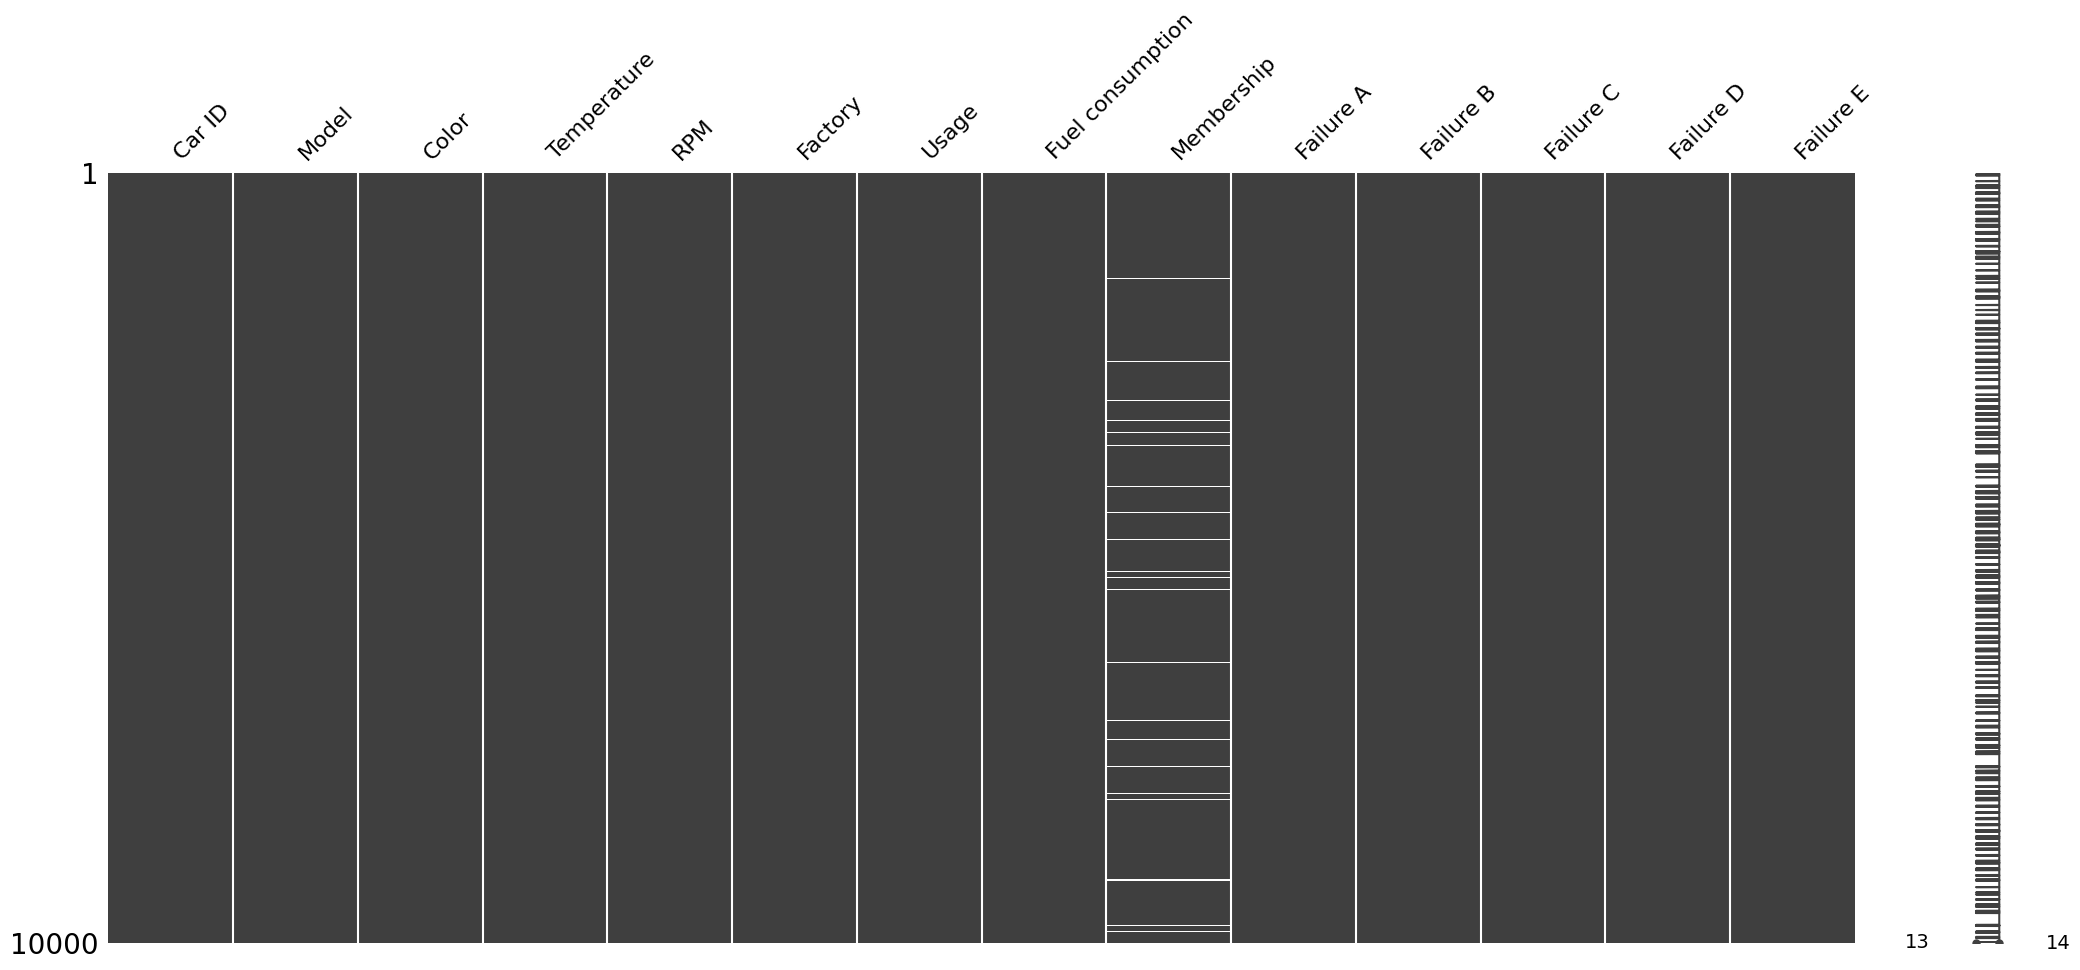

In [53]:
import missingno
missingno.matrix(df)

<AxesSubplot: >

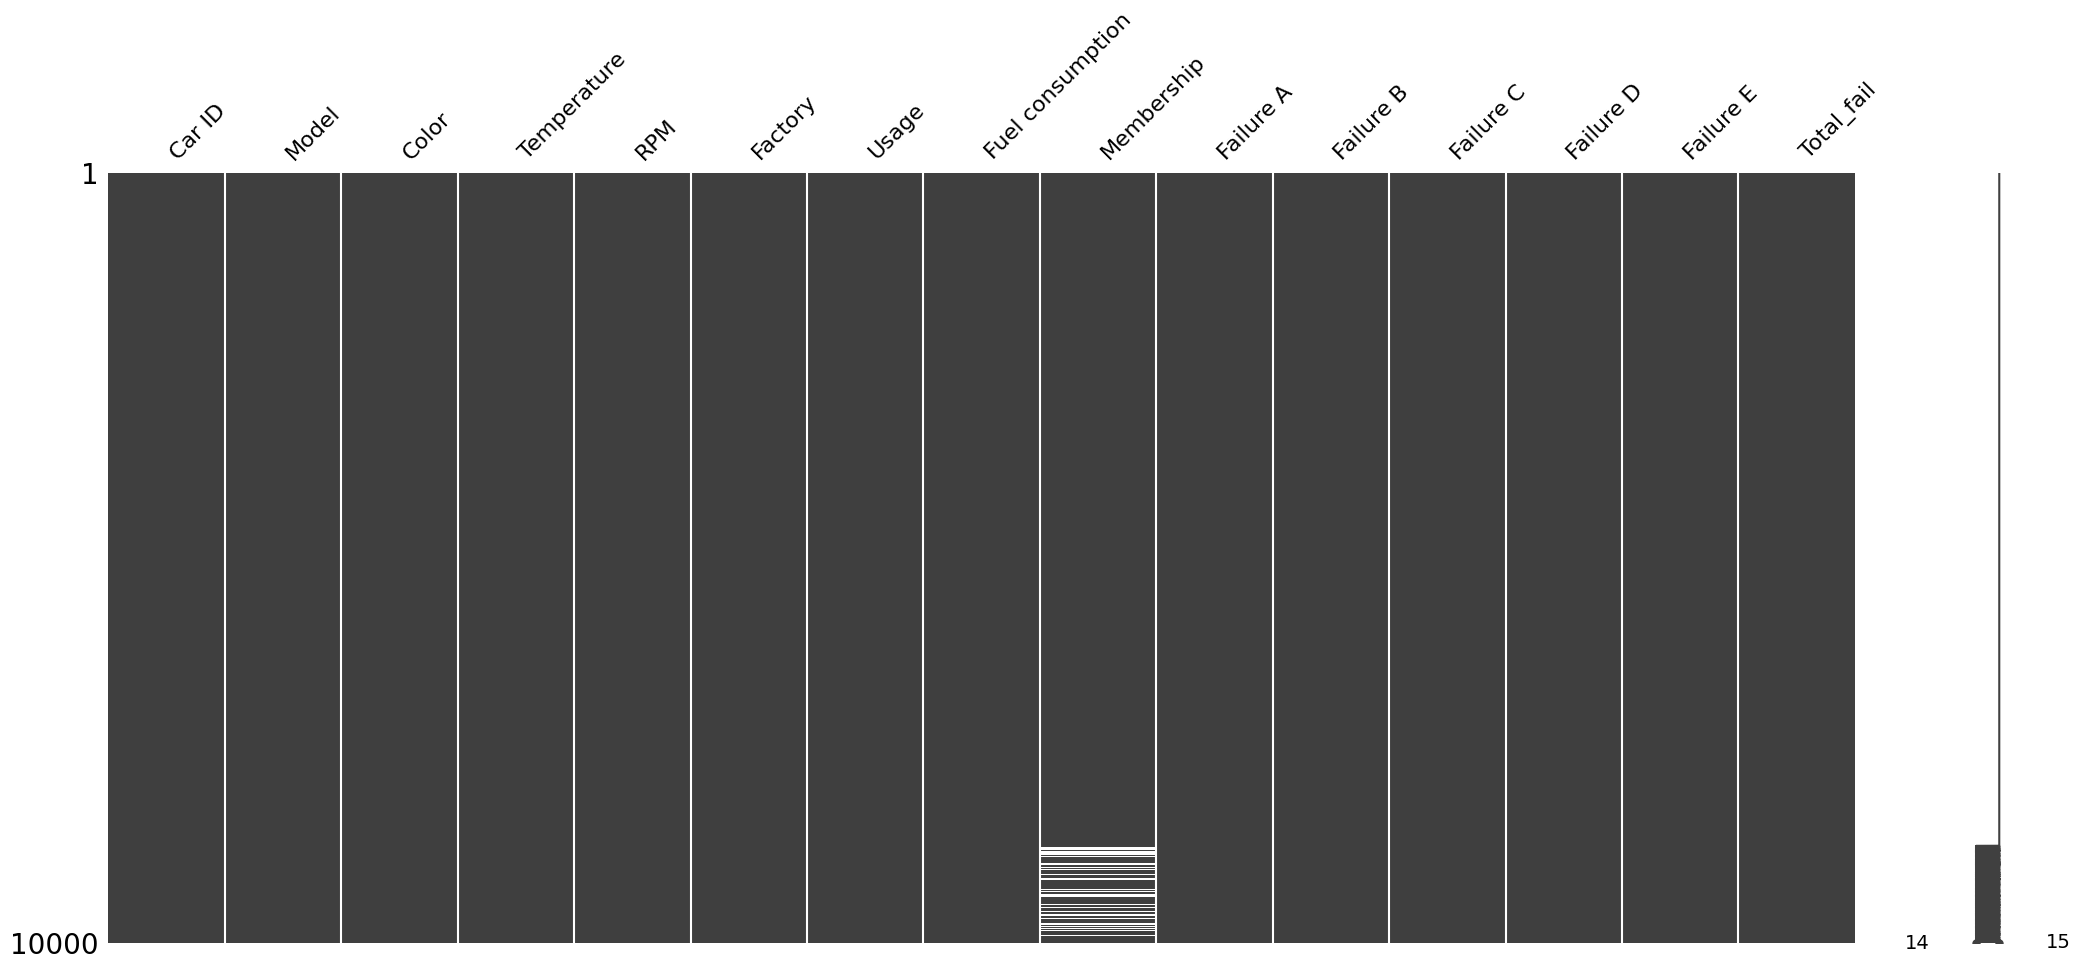

In [54]:
failure_list = ["Failure A","Failure B", "Failure C","Failure D","Failure E"]
df["Total_fail"] = df[failure_list].aggregate("sum", axis=1)
missingno.matrix(df.sort_values(["Total_fail"]))

In [55]:
df.sort_values(["Total_fail"]).tail()

,Car ID,Model,Color,Temperature,RPM,Factory,Usage,Fuel consumption,Membership,Failure A,Failure B,Failure C,Failure D,Failure E,Total_fail
1387,8eccda36-9735-4c0c-8d41-768a0c9cabc9,"Model 3, 2015",White,110.6 °C,1823,"Shang Hai, China",High,703.2,None,0,0,0,0,1,1
8442,99e917c1-8cd8-43d3-850c-8bcc94e391fd,"Model 3, 2022",Red,110.5 °C,1517,"Shang Hai, China",Low,625.6,Normal,0,0,0,0,1,1
1391,a431d443-c561-49c3-8cab-88312880ec3e,"Model 3, 2015",Red,231.1 °F,2737,"New York, U.S",Low,604.2,None,0,0,0,0,1,1
1335,150922c0-e35a-4ffb-8049-4b66d95701e5,"Model 3, 2011",Black,110.6 °C,1371,"Shang Hai, China",Low,687.9,None,1,0,0,0,0,1
7342,ee65ef2c-9dbb-4727-86e4-11d786ce8e37,"Model 5, 2022",White,111.0 °C,1661,"Shang Hai, China",Low,647.4,None,0,0,1,0,0,1


In [56]:
df.fillna("empty", inplace=True)
df.isna().sum()

Car ID              0
Model               0
Color               0
Temperature         0
RPM                 0
Factory             0
Usage               0
Fuel consumption    0
Membership          0
Failure A           0
Failure B           0
Failure C           0
Failure D           0
Failure E           0
Total_fail          0
dtype: int64

White    5568
Red      1159
Blue     1129
Grey     1086
Black    1058
Name: Color, dtype: int64


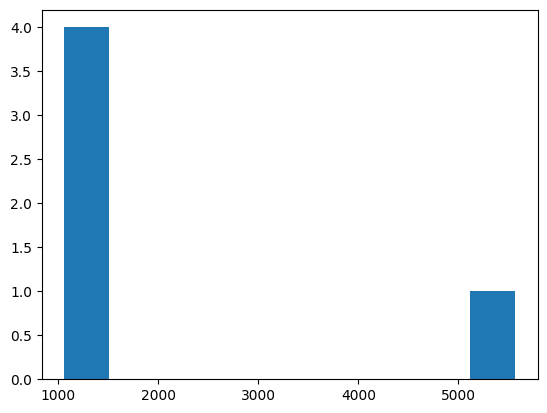

Shang Hai, China    5478
Berlin, Germany     2215
New York, U.S       2127
Seng Kang, China     106
Newton, China         44
Bedok, Germany        30
Name: Factory, dtype: int64


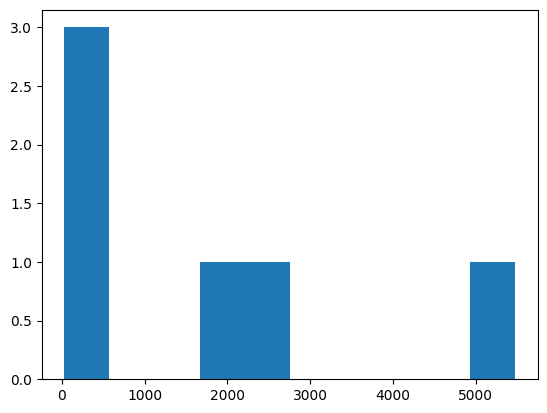

High      3527
Medium    3335
Low       3138
Name: Usage, dtype: int64


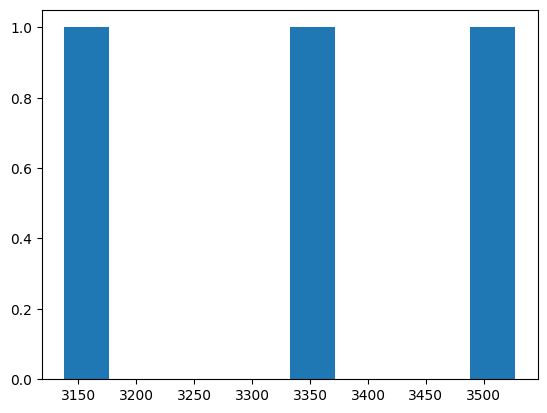

Normal     4483
Premium    3416
None       1718
empty       383
Name: Membership, dtype: int64


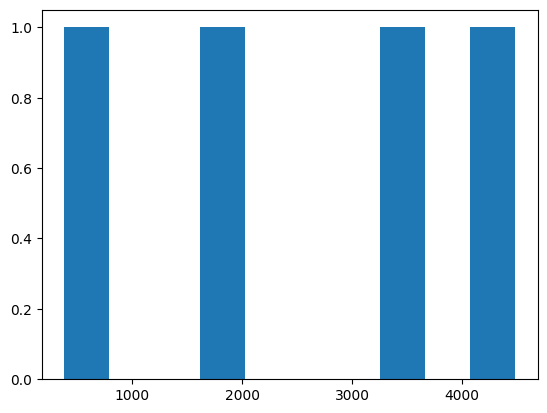

In [57]:
for col in df.drop(columns=["Car ID","Temperature", "Model"]).columns:    
    if type(df[col][0]) == str:
        print(df[col].value_counts())
        plt.hist(df[col].value_counts())
        plt.show()

In [58]:
for k,v in cat2num_dict.items():
    print(k,v)
df_total_fail[df_total_fail["Total_fail"]>0][["Fac_ctry_num","Fac_city_num"]].plot.hist()


NameError: name 'cat2num_dict' is not defined

In [ ]:
for k,v in cat2num_dict.items():
    if "Fac" in k:
        print(k,v)
df1 = df_total_fail[["Fac_ctry_num", "Fac_city_num","Total_fail"]]
df1.head()
sns.pairplot(df1
,hue="Total_fail"
)

## Drop rows with invalid Factory location


In [ ]:
print(df[["Factory"]].value_counts())
wrong_city = ["Seng Kang, China", "Newton, China", "Bedok, Germany"]
for city in wrong_city:
    print(city)
    df = df[df.Factory.str.match(city)==False]
    print(df["Factory"].value_counts())
    print("-"*10)

## Convert categorical data to numeric data

In [ ]:
df["Mod_yy"]=df.Model.apply(lambda x:int(x.split(",")[-1][-2:]))
df["Mod_num"]=df.Model.apply(lambda x: int(x.split(",")[0][-1]))
df["Fac_ctry"]=df.Factory.apply(lambda x:x.split(",")[-1])
df["Fac_city"]=df.Factory.apply(lambda x:x.split(",")[0])
df["Tem_celc"]=df.Temperature.apply(lambda x: float(x.split(" ")[0]) if x.split(" ")[-1]=="°C" else (float(x.split(" ")[0]) - 32)*(5/9))

#  float(x) if x.split(" ")[-1]=="°C" else (float(x)-32)*(5/9))
display(df.head())   

# 0°C + 273.15 = 273.15K
# (32°F − 32) × 5/9 


In [ ]:
df[df.Fac_city=="Seng Kang"].head()

In [ ]:
print(df[df.Fac_city=="Bedok"]["Fac_ctry"].unique())
print(df[df.Fac_city=="Seng Kang"]["Fac_ctry"].unique())

In [ ]:
cat_col = ["Color",	"Fac_ctry", "Fac_city"]
cat2num_dict = {}
for i, col in enumerate(cat_col):
    cat2num_dict[col] = sorted(list(df[col].unique()))

cat2num_dict["Usage"] = ['Low', 'Medium', 'High'] #incremental
cat2num_dict["Membership"] = ['Premium', 'Normal', 'None', 'empty']
print(cat2num_dict)
print(cat2num_dict["Color"].index("Blue")) 
print(cat2num_dict["Usage"].index("High"))


In [ ]:
for col, cat in cat2num_dict.items():
    df[col+"_num"] = df[col].apply(lambda x: cat.index(x))

df.head()

# df.rename(columns={"Membership_num":"Mem_num"}).head()

# assert "Membership_num" in df.columns
# df.head()

In [ ]:
df.describe()

In [ ]:
feature_drop = ['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E']
df_total_fail = df.drop(columns=feature_drop)
df_total_fail.head()


In [ ]:
sns.pairplot(df_total_fail, hue="Total_fail")
sns.set(font_scale=1)
plt.tight_layout()

In [ ]:
df["RPM_abs"] = df.RPM.apply(lambda x: abs(x))
feature_drop = ['Failure A', 'Failure B', 'Failure C', 'Failure D', 'Failure E', "RPM"]
df_total_fail = df.drop(columns=feature_drop)
sns.pairplot(df_total_fail,hue="Total_fail")
sns.set(font_scale=1)

# Financial objective:
Automotive company mitigation policies to reduce occurance of car failures

Data science objective:
accurate model to predict occurance
propose service routine, minimize cost, minize car failure

failure 



In [59]:
for col in df_total_fail.drop(columns=["Car ID"]).columns:
    print(f"col {col}")
    if (type(df_total_fail[col][0])==str) == False:
        _, ax = plt.subplots(1,2)
        plt.axes(ax[0])
        df_total_fail[col].plot.box()
        plt.title(col)

        plt.axes(ax[1])
        df_total_fail[col].plot.hist()
        plt.title(col)
        plt.show()


NameError: name 'df_total_fail' is not defined

In [ ]:
# Visualization

# Load SQl database as dataframe
## todo

In [ ]:
import sqlalchemy as sqla
import pandas as pd
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import inspect

engine = sqla.create_engine(f"sqlite://{db_path}")



In [ ]:
print(engine)

In [ ]:
from sqlalchemy.exc import SQLAlchemyError
try:
    engine.connect()
    print("success")
except SQLAlchemyError as err:
    print("error", err.__cause__)  # this will give what kind of error

In [ ]:
Base = declarative_base()


In [ ]:
connectable = engine.connect()

In [ ]:
insp = inspect(engine)

In [ ]:
engine.table_names()
engine.name
# inspector = sqla.inspect(engine)

In [ ]:
from flask_sqlalchemy import SQLAlchemy
import pymysql
import pandas as pd

import sqlite3


In [ ]:
sql_path = "src/data/failure.db"
con = sqlite3.connect(sql_path)
db = pd.read_sql(sql_path, con)

In [ ]:
"""
Evaluation
In the submitted notebook, you are required to

Outline the steps taken in the EDA process
Explain the purpose of each step
Explain the conclusions drawn from each step
Explain the interpretation of the various statistics generated and how they impact your analysis
Generate clear, meaningful, and understandable visualizations that support your findings
Organize the notebook so that is it clear and easy to understand
Please note that your submission will be heavily penalized for any of the following conditions:
1. `.ipynb` missing in the submitted repository
2. `.ipynb` cannot be opened on Jupyter Notebook
3. Explanations missing or unclear in the submitted Jupyter Notebook
"""